In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
sys.path.insert(0, '../src')
import rebound
import numpy as np
import horizons_api
import tools
import warnings
warnings.filterwarnings("ignore")
import scipy.signal as signal

import run_reb
import tools

av_init = 0
ev_init = 0
incv_init = 0
lanv_init = 0
aopv_init = 0
Mv_init = 0

ae_init = 0
ee_init = 0
ince_init = 0
lane_init = 0
aope_init = 0
Me_init = 0

am_init = 0
e_init = 0
incm_init = 0
lanm_init = 0
aopm_init = 0
Mm_init = 0

aj_init = 0
ej_init = 0
incj_init = 0
lanj_init = 0
aopj_init = 0
Mj_init = 0

as_init = 0
es_init = 0
incs_init = 0
lans_init = 0
aops_init = 0
Ms_init = 0

au_init = 0
eu_init = 0
incu_init = 0
lanu_init = 0
aopu_init = 0
Mu_init = 0

an_init = 0
en_init = 0
incn_init = 0
lann_init = 0
aopn_init = 0
Mn_init = 0

def prop_calc(objname, filename='Single',windows=9,objdes=None):
    
    """
    Calculate prop elements of small celestial bodies from simulation archive files, using a given file list of names.

    Parameters:
        objname (int): Name/designation of the celestial body in the dataset.
        filename (str): Name of the file containing the list of names, and the directory containing the arxhive.bin files. 

    Returns:
        outputs: A list containing calculated proper elements, or  
        - objname
        - Observed Eccentricity
        - Observed Sin(Inclination)
        - Calculated Proper Eccentricity
        - Calculated Proper Sin(Inclination)
        - Calculated Proper Semimajor Axis 
        - Running Block Proper Elements [Calc Proper Ecc, Calc Proper Sin(Inc), Calc Proper SMA]
        
        The Running Block calculations are used to calculate a mean error for the proper elements. The default run will be a 100 Myr integration, with running blocks from 0-20,10-30,...80-100 Myr, producing 9 running blocks total. So your default run will produce an outputs list consisting of 33 values total.  
        
        If an error occurs in the code, then outputs is instead returned as [objname,0,0,0,0,0,0,0].
        
    """    
#    print(objname)
    try:       
        fullfile = '../data/'+filename+'/'+str(objname)+'/archive.bin'
        print(fullfile)
        archive = rebound.Simulationarchive(fullfile)
        
        try:
            earth = archive[0].particles['earth']
            small_planets_flag = True
        except:
            small_planets_flag = False

        nump = len(archive[0].particles)
        #print(objname)
        flag, a_init, e_init, inc_init, lan_init, aop_init, M_init, t_init = tools.read_sa_for_sbody(sbody = str(objname), archivefile=fullfile,nclones=0,tmin=0.,tmax=archive[-1].t)
        
        global av_init
        global ev_init
        global incv_init
        global lanv_init
        global aopv_init
        global Mv_init

        global ae_init
        global ee_init
        global ince_init
        global lane_init
        global aope_init
        global Me_init

        global am_init
        global em_init 
        global incm_init
        global lanm_init
        global aopm_init
        global Mm_init

        global aj_init
        global ej_init
        global incj_init
        global lanj_init
        global aopj_init
        global Mj_init

        global as_init
        global es_init
        global incs_init
        global lans_init
        global aops_init
        global Ms_init

        global au_init
        global eu_init
        global incu_init
        global lanu_init
        global aopu_init
        global Mu_init
        
        global an_init
        global en_init
        global incn_init
        global lann_init
        global aopn_init
        global Mn_init

        
        if small_planets_flag:
            '''
            flag, av_init, ev_init, incv_init, lanv_init, aopv_init, Mv_init, t_init = tools.read_sa_for_sbody(sbody = str('venus'), archivefile=fullfile,nclones=0,tmin=(sim[-1].t),tmax=0)
            flag, ae_init, ee_init, ince_init, lane_init, aope_init, Me_init, t_init = tools.read_sa_for_sbody(sbody = str('earth'), archivefile=fullfile,nclones=0,tmin=(sim[-1].t),tmax=0)
            flag, am_init, em_init, incm_init, lanm_init, aopm_init, Mm_init, t_init = tools.read_sa_for_sbody(sbody = str('mars'), archivefile=fullfile,nclones=0,tmin=(sim[-1].t),tmax=0)
        flag, aj_init, ej_init, incj_init, lanj_init, aopj_init, Mj_init, t_init = tools.read_sa_for_sbody(sbody = str('jupiter'), archivefile=fullfile,nclones=0,tmin=(sim[-1].t),tmax=0)
        flag, as_init, es_init, incs_init, lans_init, aops_init, Ms_init, t_init = tools.read_sa_for_sbody(sbody = str('saturn'), archivefile=fullfile,nclones=0,tmin=(sim[-1].t),tmax=0)
        flag, au_init, eu_init, incu_init, lanu_init, aopu_init, Mu_init, t_init = tools.read_sa_for_sbody(sbody = str('uranus'), archivefile=fullfile,nclones=0,tmin=(sim[-1].t),tmax=0)
        flag, an_init, en_init, incn_init, lann_init, aopn_init, Mn_init, t_init = tools.read_sa_for_sbody(sbody = str('neptune'), archivefile=fullfile,nclones=0,tmin=(sim[-1].t),tmax=0)
        '''
            
            if isinstance(av_init, int):
                flag, av_init, ev_init, incv_init, lanv_init, aopv_init, Mv_init, t_init = tools.read_sa_for_sbody(sbody = str('venus'), archivefile=fullfile,nclones=0,tmax=(archive[-1].t),tmin=0)
                flag, ae_init, ee_init, ince_init, lane_init, aope_init, Me_init, t_init = tools.read_sa_for_sbody(sbody = str('earth'), archivefile=fullfile,nclones=0,tmax=(archive[-1].t),tmin=0)
                flag, am_init, em_init, incm_init, lanm_init, aopm_init, Mm_init, t_init = tools.read_sa_for_sbody(sbody = str('mars'), archivefile=fullfile,nclones=0,tmax=(archive[-1].t),tmin=0)
            
                hv = ev_init*np.sin(lanv_init+aopv_init)
                he = ee_init*np.sin(lane_init+aope_init)
                hm = em_init*np.sin(lanm_init+aopm_init)
                kv = ev_init*np.cos(lanv_init+aopv_init)
                ke = ee_init*np.cos(lane_init+aope_init)
                km = em_init*np.cos(lanm_init+aopm_init)
                pv = np.sin(incv_init)*np.sin(lanv_init)
                pe = np.sin(ince_init)*np.sin(lane_init)
                pm = np.sin(incm_init)*np.sin(lanm_init)
                qv = np.sin(incv_init)*np.cos(lanv_init)
                qe = np.sin(ince_init)*np.cos(lane_init)
                qm = np.sin(incm_init)*np.cos(lanm_init)
        
        if isinstance(aj_init, int):
            flag, aj_init, ej_init, incj_init, lanj_init, aopj_init, Mj_init, t_init = tools.read_sa_for_sbody(sbody = str('jupiter'), archivefile=fullfile,nclones=0,tmax=(archive[-1].t),tmin=0)
            flag, as_init, es_init, incs_init, lans_init, aops_init, Ms_init, t_init = tools.read_sa_for_sbody(sbody = str('saturn'), archivefile=fullfile,nclones=0,tmax=(archive[-1].t),tmin=0)
            flag, au_init, eu_init, incu_init, lanu_init, aopu_init, Mu_init, t_init = tools.read_sa_for_sbody(sbody = str('uranus'), archivefile=fullfile,nclones=0,tmax=(archive[-1].t),tmin=0)
            flag, an_init, en_init, incn_init, lann_init, aopn_init, Mn_init, t_init = tools.read_sa_for_sbody(sbody = str('neptune'), archivefile=fullfile,nclones=0,tmax=(archive[-1].t),tmin=0)

        
            
                
    except Exception as error:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
        line_number = exc_tb.tb_lineno

        error_message = "An error occurred in at line "+str(line_number)
    
        # Print the error message
        print(error_message)
        print(error)
        return [objname,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    
    p_init = np.sin(inc_init)*np.sin(lan_init)
    q_init = np.sin(inc_init)*np.cos(lan_init)
    h_init = (e_init)*np.sin(lan_init+aop_init)
    k_init = (e_init)*np.cos(lan_init+aop_init)
    
    if small_planets_flag:
        hv = ev_init*np.sin(lanv_init+aopv_init)
        he = ee_init*np.sin(lane_init+aope_init)
        hm = em_init*np.sin(lanm_init+aopm_init)
        kv = ev_init*np.cos(lanv_init+aopv_init)
        ke = ee_init*np.cos(lane_init+aope_init)
        km = em_init*np.cos(lanm_init+aopm_init)
        pv = np.sin(incv_init)*np.sin(lanv_init)
        pe = np.sin(ince_init)*np.sin(lane_init)
        pm = np.sin(incm_init)*np.sin(lanm_init)
        qv = np.sin(incv_init)*np.cos(lanv_init)
        qe = np.sin(ince_init)*np.cos(lane_init)
        qm = np.sin(incm_init)*np.cos(lanm_init)
                
    hj = ej_init*np.sin(lanj_init+aopj_init)
    hs = es_init*np.sin(lans_init+aops_init)
    hu = eu_init*np.sin(lanu_init+aopu_init)
    hn = en_init*np.sin(lann_init+aopn_init)
    kj = ej_init*np.cos(lanj_init+aopj_init)
    ks = es_init*np.cos(lans_init+aops_init)
    ku = eu_init*np.cos(lanu_init+aopu_init)
    kn = en_init*np.cos(lann_init+aopn_init)
    pj = np.sin(incj_init)*np.sin(lanj_init)
    ps = np.sin(incs_init)*np.sin(lans_init)
    pu = np.sin(incu_init)*np.sin(lanu_init)
    pn = np.sin(incn_init)*np.sin(lann_init)
    qj = np.sin(incj_init)*np.cos(lanj_init)
    qs = np.sin(incs_init)*np.cos(lans_init)
    qu = np.sin(incu_init)*np.cos(lanu_init)
    qn = np.sin(incn_init)*np.cos(lann_init)
    #print(t_init)
    
    try:
        dt = t_init[1]
    
        n = len(h_init)
        if n < 10001:
            print(n)
        freq = np.fft.fftfreq(n,d=dt)
        freqn = np.fft.rfftfreq(len(a_init),d=dt)
        rev = 1296000
    
        #particle eccentricity vectors
        Yhk= np.fft.fft(k_init+1j*h_init)
        Ypq = np.fft.fft(q_init+1j*p_init)
        Ya_f = np.fft.rfft(a_init)
        from scipy import signal
        window = signal.windows.hamming(n)
        #window = np.ones(n)
        #window = signal.windows.general_hamming(n,0.1)
        Yhk_win = Yhk*window
        Ypq_win = Ypq*window
        Ypq[0]=0
        Yhk[0]=0
        #Yq[0]=0
        #Yh[0]=0
        #Yk[0]=0
      
        imax = len(Ypq)
        #disregard antyhing with a period shorter than 5000 years
        freqlim = 1./2000.
        #disregard frequencies for which any planet has power at higher than 10% the max
        pth = 0.25
           
        #print(hk_ind,pq_ind)
        pYhk = np.abs(Yhk)**2
        pYpq = np.abs(Ypq)**2
        
        #make copies of the FFT outputs
        Ypq_f = Ypq.copy()
        Yhk_f = Yhk.copy()
      
        gind = np.argmax(np.abs(Yhk_win[1:]))+1    
        sind = np.argmax(np.abs(Ypq_win[1:]))+1
        g = freq[gind]  
        s = freq[sind]
        
    except:
        return [objname,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    
    # g1s1 -> g4s4 taken from Murray and Dermott SSD Table 7.1
    g1 = 5.46326/rev
    s1 = -5.20154/rev
    g2 = 7.34474/rev
    s2 = -6.57080/rev
    g3 = 17.32832/rev
    s3 = -18.74359/rev
    g4 = 18.00233/rev
    s4 = -17.63331/rev
    
    # g5s6 -> g8s8 taken directly from OrbFit software.
    g5 = 4.25749319/rev
    g6 = 28.24552984/rev
    g7 = 3.08675577/rev
    g8 = 0.67255084/rev
    s6 = -26.34496354/rev
    s7 = -2.99266093/rev
    s8 = -0.69251386/rev
    
    if small_planets_flag:
        Yhkv = np.fft.fft(kv+1j*hv)
        Yhke = np.fft.fft(ke+1j*he)
        Yhkm = np.fft.fft(km+1j*hm)
            
        Ypqv = np.fft.fft(qv+1j*pv)
        Ypqe = np.fft.fft(qe+1j*pe)
        Ypqm = np.fft.fft(qm+1j*pm)
        
    Yhkj = np.fft.fft(kj+1j*hj)
    Yhks = np.fft.fft(ks+1j*hs)
    Yhku = np.fft.fft(ku+1j*hu)
    Yhkn = np.fft.fft(kn+1j*hn)

    Ypqj = np.fft.fft(qj+1j*pj)
    Ypqs = np.fft.fft(qs+1j*ps)
    Ypqu = np.fft.fft(qu+1j*pu)
    Ypqn = np.fft.fft(qn+1j*pn)
    
    g_arr = []
    s_arr = []
    
    g5 = freq[np.argmax(np.abs(Yhkj[1:])**2)+1]
    g_arr.append(g5)
    while freq[np.argmax(np.abs(Yhks[1:])**2)+1] in g_arr:
        Yhks[np.argmax(np.abs(Yhks[1:])**2)+1] = 0
    g6 = freq[np.argmax(np.abs(Yhks[1:])**2)+1]
    g_arr.append(g6)
    while freq[np.argmax(np.abs(Yhku[1:])**2)+1] in g_arr:
        Yhku[np.argmax(np.abs(Yhku[1:])**2)+1] = 0
    g7 = freq[np.argmax(np.abs(Yhku[1:])**2)+1]
    g_arr.append(g7)
    while freq[np.argmax(np.abs(Yhkn[1:])**2)+1] in g_arr:
        Yhkn[np.argmax(np.abs(Yhkn[1:])**2)+1] = 0
    g8 = freq[np.argmax(np.abs(Yhkn[1:])**2)+1]
    g_arr.append(g8)
    
    s6 = freq[np.argmax(np.abs(Ypqs[1:])**2)+1]
    s_arr.append(g6)
    while freq[np.argmax(np.abs(Ypqu[1:])**2)+1] in s_arr:
        Ypqu[np.argmax(np.abs(Ypqu[1:])**2)+1] = 0
    s7 = freq[np.argmax(np.abs(Ypqu[1:])**2)+1]
    s_arr.append(s7)
    while freq[np.argmax(np.abs(Ypqn[1:])**2)+1] in s_arr:
        Ypqn[np.argmax(np.abs(Ypqn[1:])**2)+1] = 0
    s8 = freq[np.argmax(np.abs(Ypqn[1:])**2)+1]
    s_arr.append(s8)
    
    if small_planets_flag:
        while freq[np.argmax(np.abs(Yhke[1:])**2)+1] in g_arr:
            Yhke[np.argmax(np.abs(Yhke[1:])**2)+1] = 0
        g3 = freq[np.argmax(np.abs(Yhke[1:])**2)+1]
        g_arr.append(g3)
        while freq[np.argmax(np.abs(Yhkv[1:])**2)+1] in g_arr:
            Yhkv[np.argmax(np.abs(Yhkv[1:])**2)+1] = 0
        g2 = freq[np.argmax(np.abs(Yhkv[1:])**2)+1]
        g_arr.append(g2)
        while freq[np.argmax(np.abs(Yhkm[1:])**2)+1] in g_arr:
            Yhkm[np.argmax(np.abs(Yhkm[1:])**2)+1] = 0
        g4 = freq[np.argmax(np.abs(Yhkm[1:])**2)+1]
        g_arr.append(g4)
        
        while freq[np.argmax(np.abs(Ypqe[1:])**2)+1] in s_arr:
            Ypqe[np.argmax(np.abs(Ypqe[1:])**2)+1] = 0
        s3 = freq[np.argmax(np.abs(Ypqe[1:])**2)+1]
        s_arr.append(s3)
        while freq[np.argmax(np.abs(Ypqv[1:])**2)+1] in s_arr:
            Ypqv[np.argmax(np.abs(Ypqv[1:])**2)+1] = 0
        s2 = freq[np.argmax(np.abs(Ypqv[1:])**2)+1]
        s_arr.append(s2)
        while freq[np.argmax(np.abs(Ypqm[1:])**2)+1] in s_arr:
            Ypqm[np.argmax(np.abs(Ypqm[1:])**2)+1] = 0
        s4 = freq[np.argmax(np.abs(Ypqm[1:])**2)+1]
        s_arr.append(s4)

    #print(g,s,g6,s6)
    z1 = (g+s-g6-s6)
    z2 = (g+s-g5-s7)
    z3 = (g+s-g5-s6)
    z4 = (2*g6-g5)
    z5 = (2*g6-g7)
    z6 = (s-s6-g5+g6)
    z7 = (g-3*g6+2*g5)
    
    z8 = (2*(g-g6)+s-s6)
    z9 = (3*(g-g6)+s-s6)
    z10 = ((g-g6)+s-s6)

    z11 = g-2*g7+g6
    z12 = 2*g-2*g5
    z13 = -4*g+4*g7
    z14 = -2*s-s6

    if small_planets_flag:
        freq1 = [(g1),(g2),(g3),(g4),(g5),(g6),(g7),(g8),z1,z2,z3,z4,z5,z7,z8,z9]
        freq2 = [(s1),(s2),(s3),(s4),(s6),(s7),(s8),z1,z2,z3,z6,z8,z9]
    else:
        freq1 = [(g5),(g6),(g7),(g8),z1,z2,z3,z4,z5,z7,z8,z9]
        freq2 = [(s6),(s7),(s8),z1,z2,z3,z6,z8,z9]
        
    if small_planets_flag:
        freq1 = [(g1),(g2),(g3),(g4),(g5),(g6),(g7),(g8)]
        freq2 = [(s1),(s2),(s3),(s4),(s6),(s7),(s8)]
    else:
        freq1 = [(g5),(g6),(g7),(g8)]
        freq2 = [(s6),(s7),(s8)]
               
    #if small_planets_flag:
    #    freq1 = [(g1),(g2),(g3),(g4),(g5),(g6),(g7),(g8),g-z8,g-z9,g-z10,z11,z12,z13]
    #    freq2 = [(s1),(s2),(s3),(s4),(s6),(s7),(s8),s-z8,s-z9,s-z10,z14]
    #else:
    #    freq1 = [(g5),(g6),(g7),(g8),z1,z2,z3,z4,z5,z7,g-z8,g-z9,g-z10,z11,z12,z13]
    #    freq2 = [(s6),(s7),(s8),z1,z2,z3,z6,z8,z9,s-z8,s-z9,s-z10,z14]
    
    z1 = (g+s-g6-s6)
    z2 = (g+s-g5-s7)
    z3 = (g+s-g5-s6)
    z4 = (2*g6-g5)
    z5 = (2*g6-g7)
    z6 = (s-s6-g5+g6)
    z7 = (g-3*g6+2*g5)
        
    z8 = (2*(g-g6)+s-s6)
    z9 = (3*(g-g6)+s-s6)
    z10 = ((g-g6)+s-s6)
    
    z11 = g-2*g7+g6
    z12 = 2*g-2*g5
    z13 = -4*g+4*g7
    z14 = -2*s-s6

    if small_planets_flag:
        #freq1 = [(g1),(g2),(g3),(g4),(g5),(g6),(g7),(g8),z1,z2,z3,z4,z5,z7,z8,z9,g-z8,g-z9,g-z10,z11,z12,z13]
        #freq2 = [(s1),(s2),(s3),(s4),(s6),(s7),(s8),z1,z2,z3,z6,z8,z9,s-z8,s-z9,s-z10,z14]
        freq1 = [(g1),(g2),(g3),(g4),(g5),(g6),(g7),(g8),g-z8,g-z9,g-z10,z11,z12,z13,-g+2*s-g5]
        freq2 = [(s1),(s2),(s3),(s4),(s6),(s7),(s8),s-z8,s-z9,s-z10,z14,g-s+g5-s7,g+g5-2*s6,2*g-2*s6]
    else:
        freq1 = [(g5),(g6),(g7),(g8),z1,z2,z3,z4,z5,z7,g-z8,g-z9,g-z10,z11,z12,z13]
        freq2 = [(s6),(s7),(s8),z1,z2,z3,z6,z8,z9,s-z8,s-z9,s-z10,z14]
    de = [
        g-g5,
        g-g6,
        g5-g6, 
        s-s7, 
        s-s6, 
        s7-s6, 
        g+s-s7-g5, 
        g+s-s7-g6, 
        g+s-s6-g5, 
        g+s-s6-g6, 
        2*g-2*s, 
        g-2*g5+g6, 
        g+g5-2*g6, 
        2*g-g5-g6, 
        -g+s+g5-s7, 
        -g+s+g6-s7, 
        -g+s+g5-s6, 
        -g+s+g6-s6, 
        g-g5+s7-s6, 
        g-g5-s7+s6, 
        g-g6+s7-s6, 
        g-g6-s7+s6, 
        2*g-s-s7, 
        2*g-s-s6, 
        -g+2*s-g5, 
        -g+2*s-g6, 
        2*g-2*s7, 
        2*g-2*s6, 
        2*g-s7-s6, 
        g-s+g5-s7, 
        g-s+g5-s6, 
        g-s+g6-s7, 
        g-s+g6-s6, 
        g+g5-2*s7, 
        g+g6-2*s7, 
        g+g5-2*s6, 
        g+g6-2*s6, 
        g+g5-s7-s6, 
        g+g6-s7-s6, 
        s-2*s7+s6, 
        s+s7-2*s6, 
        2*s-s7-s6, 
        s+g5-g6-s7, 
        s-g5+g6-s7, 
        s+g5-g6-s6, 
        s-g5+g6-s6, 
        2*s-2*g5, 
        2*s-2*g6, 
        2*s-g5-g6, 
        s-2*g5+s7, 
        s-2*g5+s6, 
        s-2*g6+s7, 
        s-2*g6+s6, 
        s-g5-g6+s7, 
        s-g5-g6+s6, 
        2*g-2*g5, 
        2*g-2*g6, 
        2*s-2*s7, 
        2*s-2*s6, 
        g-2*g6+g7, 
        g-3*g6+2*g5, 
        2*(g-g6)+(s-s6), 
        g+g5-g6-g7, 
        g-g5-g6+g7, 
        g+g5-2*g6-s6+s7, 
        3*(g-g6)+(s-s6)
    ]
    
    freq1.extend(de)
    freq2.extend(de)
    
    secresind1 = []
    secresind2 = []
    for i in freq1:
        try:
            secresind1.append((np.abs(freq - i)).argmin())
        except:
            continue
    for i in freq2:
        try:
            secresind2.append((np.abs(freq - i)).argmin())
        except:
            continue

    ############################################################################
    #Testg find_peaks
        
    #from scipy.signal import find_peaks
    #secresind1, _ = find_peaks((np.abs(Yh[:200])**2), distance=8,threshold=40)
    #secresind2, _ = find_peaks((np.abs(Yp[:200])**2), distance=8,threshold=40)
    ############################################################################
    
    #spread = 1
    #while int(1/(freq[gind+spread]-freq[gind-spread])/dt) > 2500:
    #    spread = spread+1
      
    #freq_dist_lim = 1
    #while int(1/(freq[gind+freq_dist_lim]-freq[gind-freq_dist_lim])/dt) > 1250:
    #    freq_dist_lim = freq_dist_lim+1
    
    spread_dist1 = 1.05
    spread_dist2 = 1.1
    freq_dist = 1.35
    spreads = np.zeros(len(secresind1)+len(secresind2))
    spreads = spreads.astype(int)
    freq_dist_lims = np.zeros(len(secresind1)+len(secresind2))
    freq_dist_lims = freq_dist_lims.astype(int)
    
    ##########################################################################################################################
    '''
    for i in range(len(secresind1)): 
        if freq[secresind1[i]] > 0:
            while ((freq[secresind1[i]+spreads[i]]/freq[secresind1[i]-spreads[i]])) < spread_dist:
                spreads[i] = spreads[i]+1   
                if secresind1[i]+spreads[i] >= len(freq):
                    break
            while ((freq[secresind1[i]+freq_dist_lims[i]]/freq[secresind1[i]-freq_dist_lims[i]])) < freq_dist:
                freq_dist_lims[i] = freq_dist_lims[i]+1
                if secresind1[i]+freq_dist_lims[i] >= len(freq):
                    break
        else:
            while ((freq[secresind1[i]-spreads[i]]/freq[secresind1[i]+spreads[i]])) < spread_dist:
                spreads[i] = spreads[i]+1   
                if secresind1[i]+spreads[i] >= len(freq):
                    break               
            while ((freq[secresind1[i]-freq_dist_lims[i]]/freq[secresind1[i]+freq_dist_lims[i]])) < freq_dist:
                freq_dist_lims[i] = freq_dist_lims[i]+1
                if secresind1[i]+freq_dist_lims[i] >= len(freq):
                     break
                
    for i in range(len(secresind2)):
        if freq[secresind2[i]] > 0:
            while ((freq[secresind2[i]+spreads[i+len(secresind1)]]/freq[secresind2[i]-spreads[i+len(secresind1)]])) < spread_dist:
            #print(i,((freqn[secresind2[i]-spreads[i+len(secresind1)]])/(freqn[secresind2[i]+spreads[i+len(secresind1)]])))
                spreads[i+len(secresind1)] = spreads[i+len(secresind1)]+1
                if secresind2[i]+spreads[i+len(secresind1)] >= len(freq):
                    break
            while ((freq[secresind2[i]+freq_dist_lims[i+len(secresind1)]]/freq[secresind2[i]-freq_dist_lims[i+len(secresind1)]])) < freq_dist:
                freq_dist_lims[i+len(secresind1)] = freq_dist_lims[i+len(secresind1)]+1
                if secresind2[i]+freq_dist_lims[i+len(secresind1)] >= len(freq):
                    break
        else:
            while ((freq[secresind2[i]-spreads[i+len(secresind1)]]/freq[secresind2[i]+spreads[i+len(secresind1)]])) < spread_dist:
            #print(i,((freqn[secresind2[i]-spreads[i+len(secresind1)]])/(freqn[secresind2[i]+spreads[i+len(secresind1)]])))
                spreads[i+len(secresind1)] = spreads[i+len(secresind1)]+1
                if secresind2[i]+spreads[i+len(secresind1)] >= len(freq):
                    break
            while ((freq[secresind2[i]-freq_dist_lims[i+len(secresind1)]]/freq[secresind2[i]+freq_dist_lims[i+len(secresind1)]])) < freq_dist:
                freq_dist_lims[i+len(secresind1)] = freq_dist_lims[i+len(secresind1)]+1
                if secresind2[i]+freq_dist_lims[i+len(secresind1)] >= len(freq):
                    break
    '''
    for i in range(len(secresind1)): 
        if freq[secresind1[i]] > 0:
            
            while ((freq[secresind1[i]+spreads[i]]/freq[secresind1[i]-spreads[i]])) < spread_dist1:
                spreads[i] = spreads[i]+1   
                if secresind1[i]-spreads[i] == 0:
                    break
                
                if freq[secresind1[i]+spreads[i]] < 0:
                    #print(freq[secresind1[i]+spreads[i]],secresind1[i],spreads[i])
                    break
            while ((freq[secresind1[i]+freq_dist_lims[i]]/freq[secresind1[i]-freq_dist_lims[i]])) < freq_dist:
                freq_dist_lims[i] = freq_dist_lims[i]+1
                if secresind1[i]+freq_dist_lims[i] >= len(freq):
                    break
        else:
            while ((freq[secresind1[i]-spreads[i]]/freq[secresind1[i]+spreads[i]])) < spread_dist1:
                spreads[i] = spreads[i]+1   
                if secresind1[i]+spreads[i] >= len(freq):
                    break    
                if freq[secresind1[i]-spreads[i]] > 0:
                    break
            while ((freq[secresind1[i]-freq_dist_lims[i]]/freq[secresind1[i]+freq_dist_lims[i]])) < freq_dist:
                freq_dist_lims[i] = freq_dist_lims[i]+1
                if secresind1[i]+freq_dist_lims[i] >= len(freq):
                     break
                
    for i in range(len(secresind2)):
        if freq[secresind2[i]] > 0:
            while ((freq[secresind2[i]+spreads[i+len(secresind1)]]/freq[secresind2[i]-spreads[i+len(secresind1)]])) < spread_dist2:
            #print(i,((freqn[secresind2[i]-spreads[i+len(secresind1)]])/(freqn[secresind2[i]+spreads[i+len(secresind1)]])))
                spreads[i+len(secresind1)] = spreads[i+len(secresind1)]+1
                if secresind2[i]-spreads[i+len(secresind1)] == 0:
                    break
                if freq[secresind2[i]+spreads[i+len(secresind1)]] < 0:
                    break
            while ((freq[secresind2[i]+freq_dist_lims[i+len(secresind1)]]/freq[secresind2[i]-freq_dist_lims[i+len(secresind1)]])) < freq_dist:
                freq_dist_lims[i+len(secresind1)] = freq_dist_lims[i+len(secresind1)]+1
                if secresind2[i]+freq_dist_lims[i+len(secresind1)] >= len(freq):
                    break
        else:
            while ((freq[secresind2[i]-spreads[i+len(secresind1)]]/freq[secresind2[i]+spreads[i+len(secresind1)]])) < spread_dist2:
            #print(i,((freqn[secresind2[i]-spreads[i+len(secresind1)]])/(freqn[secresind2[i]+spreads[i+len(secresind1)]])))
                spreads[i+len(secresind1)] = spreads[i+len(secresind1)]+1
                if secresind2[i]+spreads[i+len(secresind1)] >= len(freq):
                    break
                if freq[secresind2[i]+spreads[i+len(secresind1)]] > 0:
                    break
            while ((freq[secresind2[i]-freq_dist_lims[i+len(secresind1)]]/freq[secresind2[i]+freq_dist_lims[i+len(secresind1)]])) < freq_dist:
                freq_dist_lims[i+len(secresind1)] = freq_dist_lims[i+len(secresind1)]+1
                if secresind2[i]+freq_dist_lims[i+len(secresind1)] >= len(freq):
                    break
    '''
    for i in range(len(secresind1)):
        if secresind1[i] == gind:
            continue
        if abs(secresind1[i] - gind) < freq_dist_lim:
            continue

        if spread > 0:
            Yh_f[secresind1[i]-spread:secresind1[i]+spread] = 0
            Yk_f[secresind1[i]-spread:secresind1[i]+spread] = 0
        else:
            Yh_f[secresind1[i]] = 0
            Yk_f[secresind1[i]] = 0
            
    for i in range(len(secresind2)):
        if secresind2[i] == sind:
            continue
        if abs(secresind2[i] - sind) < freq_dist_lim:
            continue

        if spread > 0:
            Yp_f[secresind2[i]-spread:secresind2[i]+spread] = 0
            Yq_f[secresind2[i]-spread:secresind2[i]+spread] = 0
        else:
            Yp_f[secresind2[i]] = 0
            Yq_f[secresind2[i]] = 0
    '''       
    '''
    ##########################################################################################
    #Using different spreads for different values
    for i in range(len(secresind1)):
        if secresind1[i] == gind:
            Yhk_f[secresind1[i]] = 0
            continue
        if abs(secresind1[i] - gind) < freq_dist_lims[i]:
            continue
    
        if spreads[i] > 0:
            Yhk_f[secresind1[i]-spreads[i]:secresind1[i]+spreads[i]] = 0
        else:
            Yhk_f[secresind1[i]] = 0
                
    for i in range(len(secresind2)):
        if secresind2[i] == sind:
            #Ypq_f[secresind2[i]] = 0
            continue
        if abs(secresind2[i] - sind) < freq_dist_lims[i+len(secresind1)]:
            continue
    
        if spreads[i+len(secresind1)] > 0:
            Ypq_f[secresind2[i]-spreads[len(secresind1)+i]:secresind2[i]+spreads[len(secresind1)+i]] = 0
        else:
            Ypq_f[secresind2[i]] = 0
    ##########################################################################################
    '''    
    
##########################################################################################################################
    Yhk_copy = Yhk_f.copy()    
    Ypq_copy = Ypq_f.copy()    
    
    for i in range(len(secresind1)):
        if secresind1[i] == gind:
            if small_planets_flag:
                if i<=3 or i>=8:
                    Yhk_f[secresind1[i]] = Yhk_f[secresind1[i]]*0.995
                else:
                    Yhk_f[secresind1[i]] = Yhk_f[secresind1[i]]*0.1
            else:
                if i>=4:
                    Yhk_f[secresind1[i]] = Yhk_f[secresind1[i]]*0.995
                else:
                    Yhk_f[secresind1[i]] = Yhk_f[secresind1[i]]*0.1
            #Yhk_f[secresind1[i]-1] = 0
            #Yhk_f[secresind1[i]-1] = 0
            continue
        if abs(secresind1[i] - gind) < freq_dist_lims[i]:
            if small_planets_flag:
                if i<=3 or i>=8:
                    Yhk_f[gind] = Yhk_copy[gind]*0.995
                else:
                    Yhk_f[gind] = Yhk_copy[gind]*0.1
            else:
                if i>=4:
                    Yhk_f[gind] = Yhk_copy[gind]*0.995
                else:
                    Yhk_f[gind] = Yhk_copy[gind]*0.1
            continue
    
        if spreads[i] > 0:

            minarr = np.array([(Yhk_copy[secresind1[i]-2*spreads[i]-1:secresind1[i]-spreads[i]-1]),(Yhk_copy[secresind1[i]+spreads[i]+1:secresind1[i]+2*spreads[i]+1])])
            if secresind1[i] <= 3:
                continue
            minind = np.unravel_index(np.argmin(np.abs(minarr), axis=None), minarr.shape)
            #print(minind,minarr)
            #print(spreads[i],minarr[minind],minarr,minind,secresind1[i],len(freq))
            Yhk_f[secresind1[i]-spreads[i]:secresind1[i]+spreads[i]] = minarr[minind]
            #Yhk_f[secresind1[i]-spreads[i]:secresind1[i]+spreads[i]] = np.mean(minarr)
        else:
        #Yh_f[secresind1[i]] = 0
            #Yk_f[secresind1[i]] = 0
            Yhk_f[secresind1[i]] = 0.5+0.5j
                
    for i in range(len(secresind2)):
        if secresind2[i] == sind:
            if small_planets_flag:
                if i<=3 or i>=8:
                    Ypq_f[secresind2[i]] = Ypq_f[secresind2[i]]*0.995
                else:
                    Ypq_f[secresind2[i]] = Ypq_f[secresind2[i]]*0.1
            else:
                if i>=4:
                    Ypq_f[secresind2[i]] = Ypq_f[secresind2[i]]*0.995
                else:
                    Ypq_f[secresind2[i]] = Ypq_f[secresind2[i]]*0.1
            #Yhk_f[secresind1[i]] = 0.5+0.5j
            continue
        if abs(secresind2[i] - sind) < freq_dist_lims[i+len(secresind1)]:
            if small_planets_flag:    
                if i<=3 or i>=8:
                    Ypq_f[sind] = Ypq_f[sind]*0.995
                else:
                    Ypq_f[sind] = Ypq_copy[sind]*0.1
            else:
                if i>=4:
                    Ypq_f[sind] = Ypq_f[sind]*0.995
                else:
                    Ypq_f[sind] = Ypq_copy[sind]*0.1
            continue
    
        if spreads[i] > 0:
            minarr = np.array([(Ypq_copy[secresind2[i]-2*spreads[i+len(secresind1)]-1:secresind2[i]-spreads[i+len(secresind1)]-1]),(Ypq_copy[secresind2[i]+spreads[i+len(secresind1)]+1:secresind2[i]+2*spreads[i+len(secresind1)]+1])])
            if secresind2[i] <= 3:
                continue
            minind = np.unravel_index(np.argmin(np.abs(minarr), axis=None), minarr.shape)
            
            Ypq_f[secresind2[i]-spreads[i+len(secresind1)]:secresind2[i]+spreads[i+len(secresind1)]] = minarr[minind]
        #Ypq_f[secresind1[i]-spreads[i]:secresind1[i]+spreads[i]] = np.mean(minarr)
        else:
            Ypq_f[secresind2[i]] = 0.5+0.5j
######################################################################################################################                
                    
    limit_ind = np.where(freq >= freqlim)[0]
    limit_indr = np.where(freqn >= freqlim)[0]

    
    
    Ypq_f[limit_ind] = 0
    Yhk_f[limit_ind] = 0
    Ya_f[limit_indr] = 0
    
    pq_f = np.fft.ifft(Ypq_f,len(p_init))
    hk_f = np.fft.ifft(Yhk_f,len(h_init))
    a_f = np.fft.irfft(Ya_f,len(a_init))

    sini_f = np.abs(pq_f)
    ecc_f = np.abs(hk_f) 

    h_mom = np.sqrt(a_f*(1-ecc_f**2))*np.cos(np.arcsin(sini_f))+1/2/a_f
    
    print(secresind1,secresind2,1/np.array(freq1),1/np.array(freq2))
    gs = np.array([g1,g2,g3,g4,g5,g6,g7,g8])
    outputs =  Yhk_win,Ypq_win,gs,freq_dist_lims,freq,freq1,g,s,Ypq_f,Yhk_f,Yhk_copy,Ypq_copy,np.array([np.nanmean(a_init),np.nanmean(e_init),np.nanmean(np.sin(inc_init)),np.nanmean(np.sqrt(a_init*(1-e_init**2))),np.nanmean(a_init),np.mean(ecc_f),np.nanmean(sini_f),np.nanmean(h_mom)])
    return outputs


In [178]:
filename = 'Asteroids1000'
windows=2
objname = '582'
objdes='582'
objind = 569

objname = '865'
objdes=objname
objind = 842

#155 is like 454
#Obj 454 has a ctalog prop ecc above the average
#Obj 512 is storngly chaotic
#Obj 598 does better when the peak frequency is damped down
#Obj 677 is storngly chaotic

#objname = '759'
#objdes='objname
#objind=737

#objname = '759'
#objdes=objname


Yhk_win,Ypq_win,gs,freq_dist_lims,freq,freq1,g,s,Ypq_f,Yhk_f,Yhk_copy,Ypq_copy,data = prop_calc(objname, filename,windows,objdes)

catalog1 = pd.read_csv('data_files/Asteroids1000.csv')
#print('Catalog Name:', catalog1['Name'][737])
#print('Catalog SMA:', catalog1['a(AU)'][737])
#print('Catalog ecc:', catalog1['e'][737])
#print('Catalog sini:', catalog1['sinI'][737])


print('Catalog Name:', catalog1['Name'][objind])
print('Catalog SMA:', catalog1['a(AU)'][objind])
print('Catalog ecc:', catalog1['e'][objind])
print('Catalog sini:', catalog1['sinI'][objind])
print(data)

../data/Asteroids1000/865/archive.bin
[42, 56, 55, 137, 33, 218, 24, 5, 346, 306, 386, 428, 450, 9065, 8968, 225, 40, 9816, 9653, 9833, 180, 9878, 9693, 57, 9873, 1258, 410, 9856, 265, 9428, 9613, 9608, 9793, 405, 45, 220, 9861, 910, 1090, 8968, 8783, 562, 922, 742, 685, 865, 870, 1050, 337, 522, 697, 882, 517, 702, 9473, 12, 9485, 9468, 9838, 9648, 17, 9193, 8823, 9008, 9541, 9361, 9171, 8991, 9356, 9176, 450, 80, 9305, 9665, 9847, 9671, 9913, 49, 31, 35, 9953] [9961, 9953, 9856, 9864, 9798, 9978, 9996, 9718, 9678, 9758, 945, 685, 697, 922, 225, 40, 9816, 9653, 9833, 180, 9878, 9693, 57, 9873, 1258, 410, 9856, 265, 9428, 9613, 9608, 9793, 405, 45, 220, 9861, 910, 1090, 8968, 8783, 562, 922, 742, 685, 865, 870, 1050, 337, 522, 697, 882, 517, 702, 9473, 12, 9485, 9468, 9838, 9648, 17, 9193, 8823, 9008, 9541, 9361, 9171, 8991, 9356, 9176, 450, 80, 9305, 9665, 9847, 9671, 9913, 49, 31, 35, 9953] [ 237220.9999158   178592.85749988  181840.00036351   73001.45999995
  303066.66727252   45877

../data/Asteroids1000/784/archive.bin


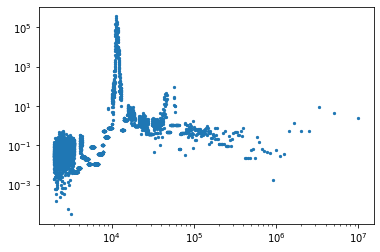

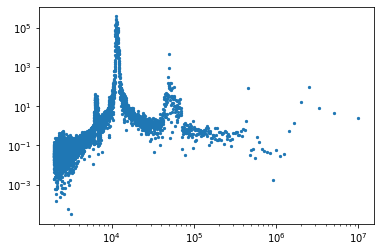

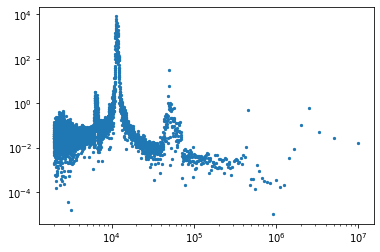

13551.7615447064 [ 237220.9999158   178592.85749988  181840.00036351   73001.45999995
  303066.66727252   45877.0643119   416716.66749972 2000240.00399866
   26458.20111109  -70430.98605629   11137.19378618   11014.53746695
    7093.04965957   -3501.82073529   -3942.13638943   14186.09931914
   19233.07696153  -54060.54064861  -11629.30234883  -14707.64708823
   55562.2223333   -64523.87109673  -29415.29417645  400048.00079973
  -62507.50012496    3084.88587908   11237.30339325   29854.32841789
    8164.24491428   -6390.54314377   -7247.2463913    -7221.08304693
   -8334.33334999   11300.79098304   19049.90479999   14287.42859999
   29415.29417645    4198.65659949    3903.66901639   -3942.13638943
   -3674.21014695    6571.09068331    5314.13391073    5876.14572268
    5963.74479427    5385.67583198    5371.21375939    4897.74731635
   12241.3708935     9981.2375449     8497.19627867    7343.02497797
   10031.2939017     8461.25213197   -9616.53848076  -20002.40003999
   -6494.28572727

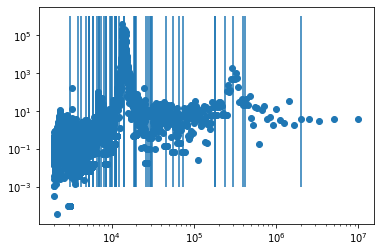

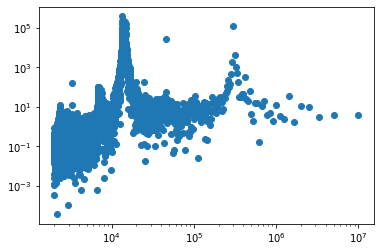

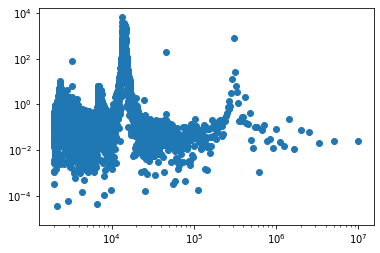

13551.7615447064 [ 237220.9999158   178592.85749988  181840.00036351   73001.45999995
  303066.66727252   45877.0643119   416716.66749972 2000240.00399866
   26458.20111109  -70430.98605629   11137.19378618   11014.53746695
    7093.04965957   -3501.82073529   -3942.13638943]
[ 2  2  2  4  1  6  1  1 10  4 22 23 35 70 62  1  2  4  4  5  1  1 31 43
 18 49 41 29 46] [  4   6   5  13   3  20   3   1  35  13  82  83 129 260 231   4   5  14
  13  19   3   1 113 161  66 179 153 107 172]
[  7   9   9  21   5  33   4   1  57  22 134 136 210 426 378 105  78  28
 129 102  27  24  51   4  24 483 133  50 183 234 206 207 179 132  79 105
  51 355 382 378 406 227 281 254 250 277 278 305 122 150 176 203 149 177
 155  75 230 156 101 129  74 273 328 301 145 172 200 227 173 200 210 155
 257 203  49  23  54  79  77  77 132   6   8  22  21  31   4   1 186 263
 108 294 250 176 281 105  78  28 129 102  27  24  51   4  24 483 133  50
 183 234 206 207 179 132  79 105  51 355 382 378 406 227 281 254 250 277
 27

In [177]:
import prop_elem
outputs,Yhk_f_og,Ypq_f_of,g_og,s_og,freq1_og,freq2_og,spreads_og,freq_dist_lim_og = prop_elem.prop_calc(objname, filename,windows,objdes,debug=True)
plt.scatter(1/np.flip(freq),np.abs(Ypq_f)**2,s=5)
#plt.vlines(1/gs,ymin=1e-3,ymax=1e6)
#plt.vlines(1/np.array(freq1),ymin=1e-3,ymax=1e6)
#plt.scatter(1/freq,np.abs(Yhk_f_og-Yhk_f)**2)
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.scatter(1/np.flip(freq),np.abs(Ypq_copy)**2,s=5)
#plt.scatter(1/freq,np.abs(Yhk_f_og-Yhk_f)**2)
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.scatter(1/np.flip(freq),np.abs(Ypq_win)**2,s=5)
#plt.scatter(1/freq,np.abs(Yhk_f_og-Yhk_f)**2)
plt.xscale('log')
plt.yscale('log')
plt.show()

print(1/g_og,1/np.array(freq1))
print(spreads_og,freq_dist_lim_og)
print(freq_dist_lims)
plt.scatter(1/freq,np.abs(Yhk_f)**2)
#plt.vlines(1/gs,ymin=1e-3,ymax=1e6)
plt.vlines(1/np.array(freq1),ymin=1e-3,ymax=1e6)
#plt.scatter(1/freq,np.abs(Yhk_f_og-Yhk_f)**2)
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.scatter(1/freq,np.abs(Yhk_copy)**2)
#plt.scatter(1/freq,np.abs(Yhk_f_og-Yhk_f)**2)
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.scatter(1/freq,np.abs(Yhk_win)**2)
#plt.scatter(1/freq,np.abs(Yhk_f_og-Yhk_f)**2)
plt.xscale('log')
plt.yscale('log')
plt.show()

print(1/g_og,1/np.array(freq1_og))
print(spreads_og,freq_dist_lim_og)
print(freq_dist_lims)

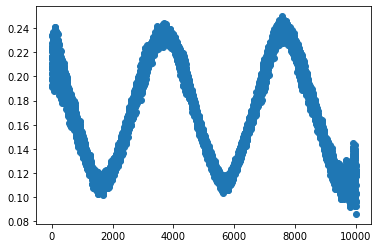

In [100]:
plt.scatter(range(10001),np.abs(np.fft.ifft(Yhk_f)))

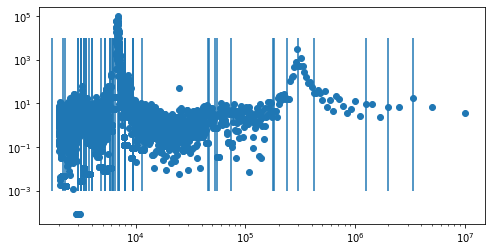

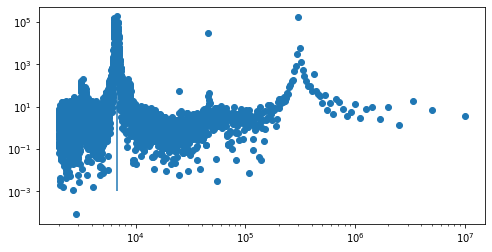

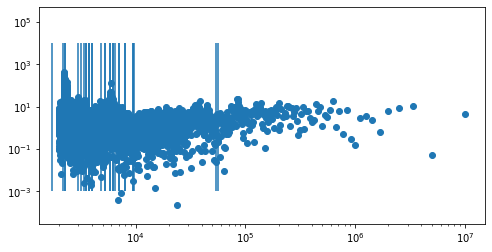

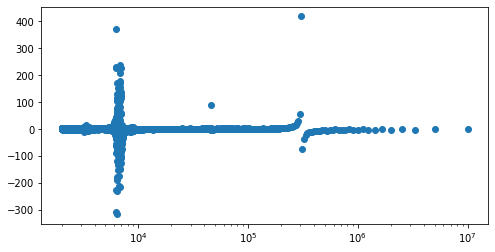

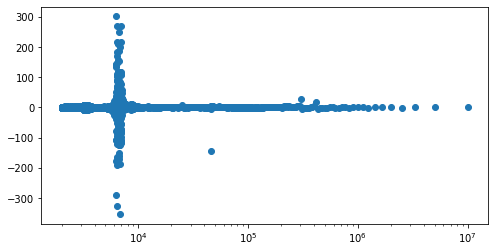

0.10316637007895983


In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.scatter(1/freq,np.abs(Yhk_f)**2)
#freq1 = [(g1),(g2),(g3),(g4),(g5),(g6),(g7),(g8),g-z8,g-z9,g-z10,z11,z12,z13,-g+2*s-g5]
plt.vlines(1/np.array(freq1),ymin=1e-3,ymax=1e4)
#plt.scatter(1/freq,np.abs(Yhk_copy-Yhk_f)**2)
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.figure(figsize=(8,4))
plt.scatter(1/freq,np.abs(Yhk_copy)**2)
plt.vlines(1/g,ymin=1e-3,ymax=1e4)
#plt.scatter(1/freq,np.abs(Yhk_copy-Yhk_f)**2)
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.figure(figsize=(8,4))
plt.vlines(-1/np.array(freq1),ymin=1e-3,ymax=1e4)
plt.scatter(1/np.flip(freq),np.abs(Yhk_copy)**2)
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.figure(figsize=(8,4))
plt.scatter(1/freq,np.real(Yhk_copy))
plt.xscale('log')
#plt.yscale('log')
plt.show()
plt.figure(figsize=(8,4))
plt.scatter(1/(freq),np.imag(Yhk_copy))
plt.xscale('log')
#plt.yscale('log')
plt.show()

print(np.mean(np.abs(np.fft.ifft(Yhk_f))))

In [5]:
hk_f = np.fft.ifft(Yhk_f)
plt.scatter(range(len(e_init)),e_init)
plt.show()

plt.scatter(range(len(hk_f)),hk_f)
plt.show()
plt.scatter(range(len(hk_f)),np.abs(hk_f))
plt.show()

TypeError: object of type 'int' has no len()

In [ ]:

plt.scatter(1/freq,np.abs(np.fft.fft(hv))**2)
plt.vlines(1/freq[57],ymin=1e-5,ymax=1e4)
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.scatter(1/freq,np.abs(np.fft.fft(he))**2)
plt.vlines(1/freq[134],1e-5,1e4)
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.scatter(1/freq,np.abs(np.fft.fft(hm))**2)
plt.vlines(1/freq[139],1e-5,1e4)
plt.xscale('log')
plt.yscale('log')
plt.show()